# FitzHugh-Nagumo model

Source: https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/phase-plane-analysis.html

fixed_point: (-1.0000000000000002, -4.440892098500626e-16)


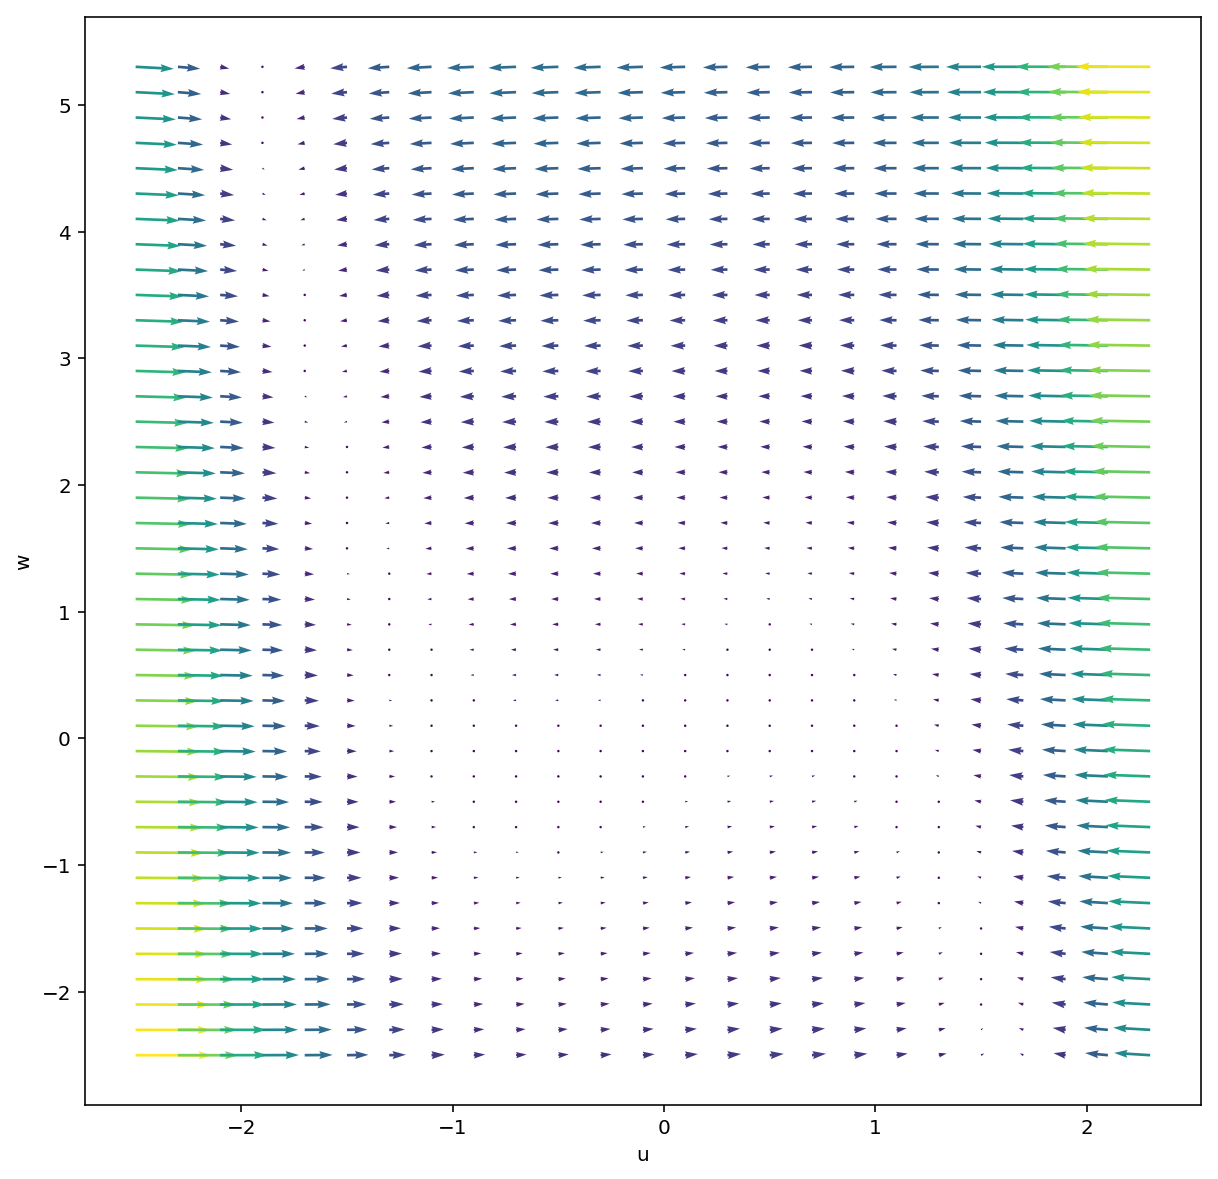

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10.0, 10.0]

import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.phase_plane_analysis import fitzhugh_nagumo

fitzhugh_nagumo.plot_flow()
plt.xlabel('u')
plt.ylabel('w')

fixed_point = fitzhugh_nagumo.get_fixed_point()
print("fixed_point: {}".format(fixed_point))

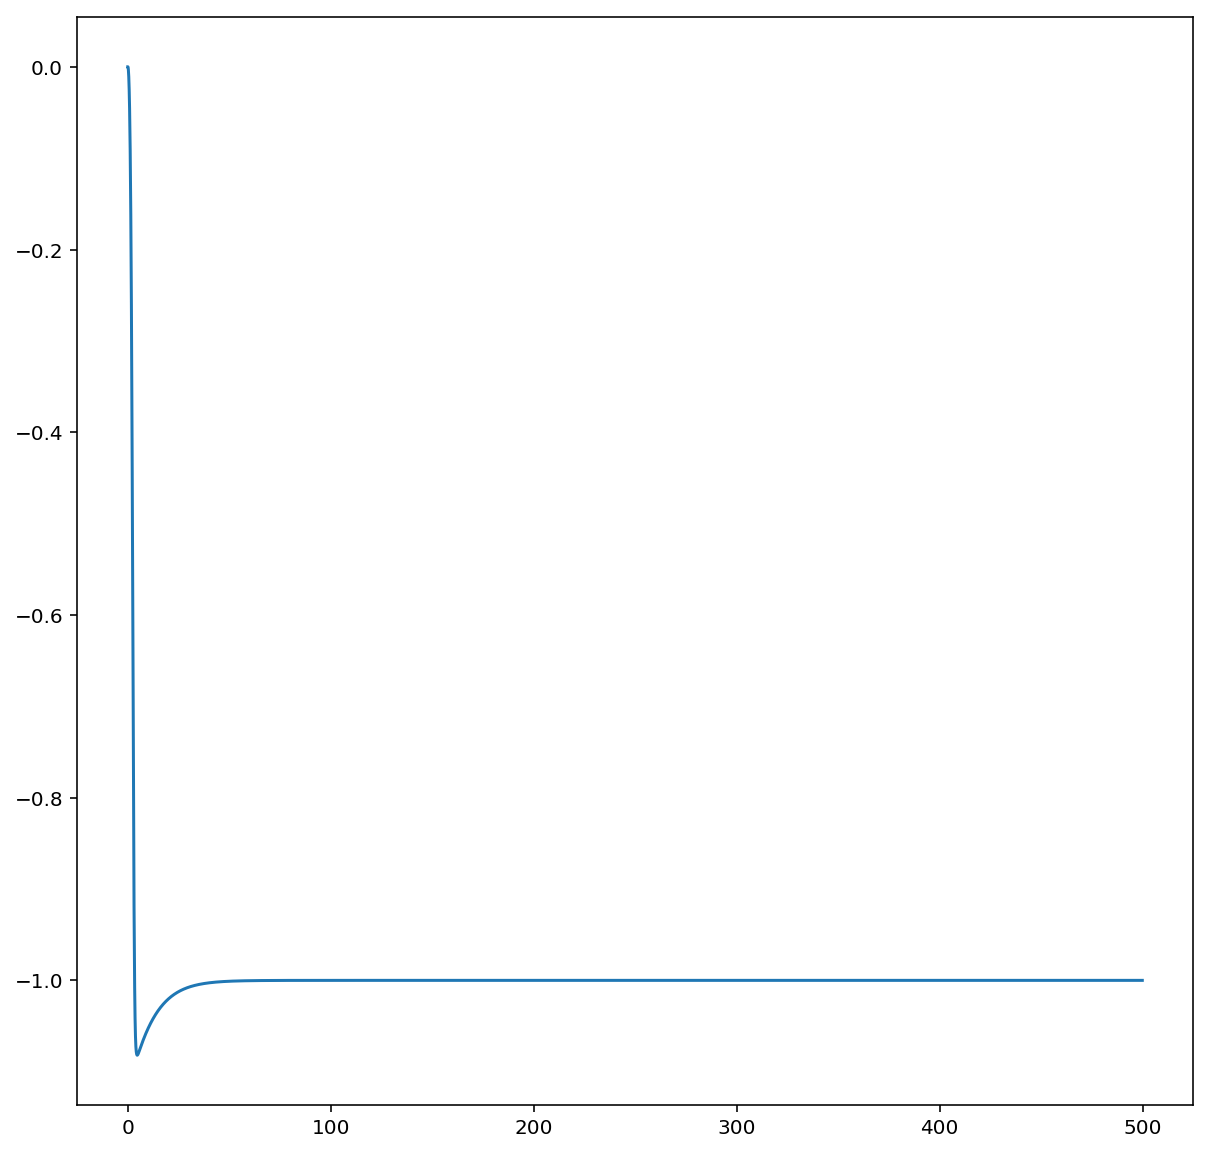

In [6]:
plt.figure(figsize=(10, 10))
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])

## Question 7.1.1


$$
   \left[\begin{array}{ccll}
   {\displaystyle \frac{du}{dt}} &=& u\left(1-u^{2}\right)-w+I \equiv F(u,w)\\[.2cm]
   {\displaystyle \frac{dw}{dt}} &=& \varepsilon \left(u -0.5w+1\right) \equiv \varepsilon G(u,w)\, ,\\
   \end{array}\right.
$$

Then to trace out the nullclines, we set $\frac{du}{dt}$ = 0, $\frac{dw}{dt}$ = 0. This gives:

(u nullcline): $w = u(1-u^2)+I$

(w nullcline): $w = 2 + 2u$

Text(0, 0.5, 'u')

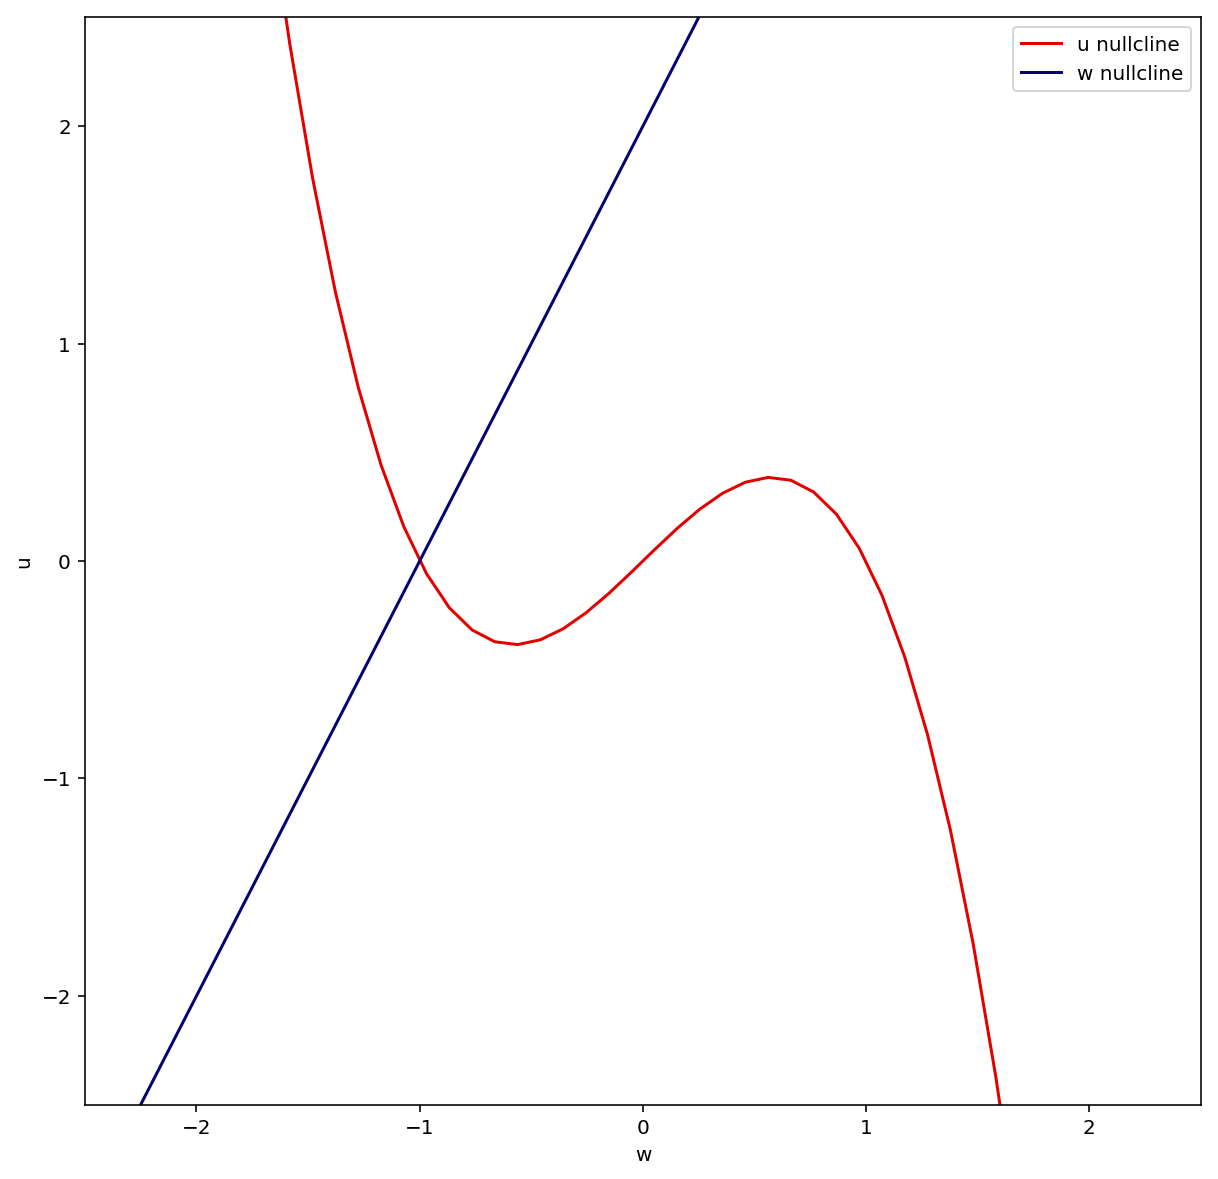

In [17]:
u = np.linspace(-2.5, 2.5)
I = 0
w_0 = u * (1 - u**2) + I
w_1 = 2 + 2 * u

plt.plot(u, w_0, color='xkcd:red')
plt.plot(u, w_1, color='xkcd:deep blue')
plt.xlim((-2.5, 2.5))
plt.ylim((-2.5, 2.5))
plt.legend(('u nullcline', 'w nullcline'))
plt.xlabel('w')
plt.ylabel('u')

## Q 7.1.2

(-1, 3)

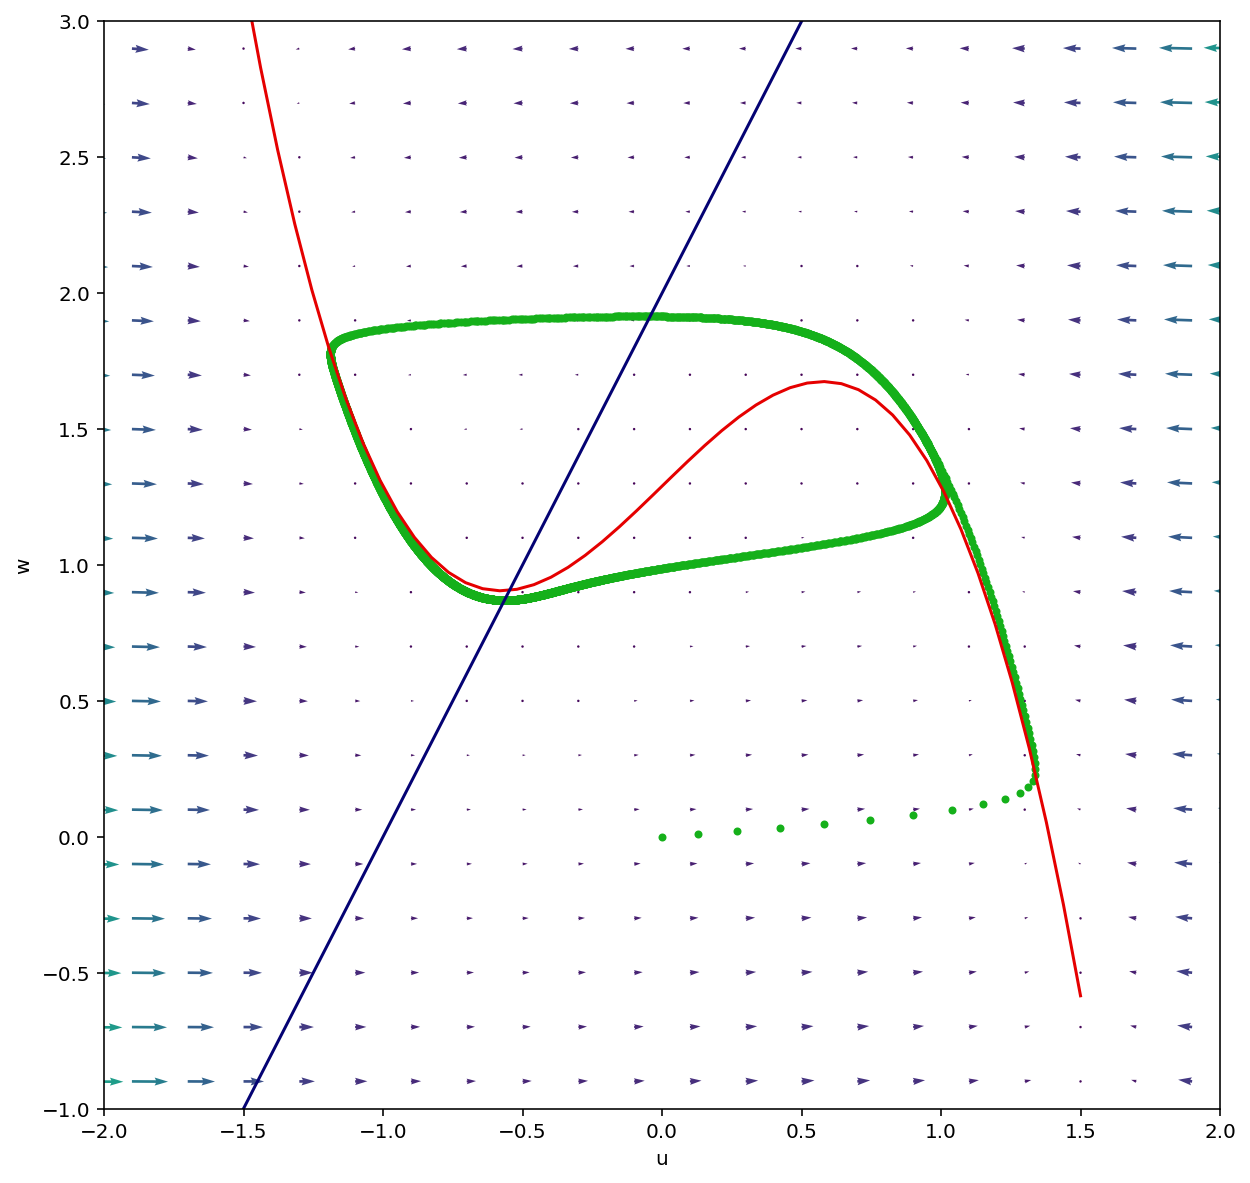

In [43]:
u_0 = 0
w_0 = 0
I = 1.29
t, u, w = fitzhugh_nagumo.get_trajectory(u_0, w_0, I)
plt.plot(u, w, '.', color='xkcd:green')
plt.xlabel('u')
plt.ylabel('w')

u = np.linspace(-1.5, 1.5)

w_0 = u * (1 - u**2) + I
w_1 = 2 + 2 * u
plt.plot(u, w_0, color='xkcd:red')
plt.plot(u, w_1, color='xkcd:deep blue')

fitzhugh_nagumo.plot_flow(I)
plt.xlim((-2.0, 2.0))
plt.ylim((-1, 3))

We see the characteristic hugging of the nullclines during the periodic orbit.

In [50]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(I):
    u_0 = 0
    w_0 = 0
    t, u, w = fitzhugh_nagumo.get_trajectory(u_0, w_0, I)
    plt.plot(u, w, '.', color='xkcd:green')
    plt.xlabel('u')
    plt.ylabel('w')

    u = np.linspace(-1.5, 1.5)

    w_0 = u * (1 - u**2) + I
    w_1 = 2 + 2 * u
    plt.plot(u, w_0, color='xkcd:red')
    plt.plot(u, w_1, color='xkcd:deep blue')
    plt.legend(('trajectory', 'u nullcline', 'w nullcline'))

    fitzhugh_nagumo.plot_flow(I)
    plt.xlim((-2.0, 2.0))
    plt.ylim((-1, 3))

interact(f, I=1.3)

interactive(children=(FloatSlider(value=1.3, description='I', max=3.9000000000000004, min=-1.3), Output()), _d…

<function __main__.f(I)>

With I = 0.0, we get no spike. With I = .2, we get one real spike. With I = 1.3, we get a strain of spikes. What happens is the left local minimum of the u nullcline crosses over to the left of w nullcline. Thus a periodic orbit appears.

## Question 7.2.1

In [55]:
def jacobian(u_0, w_0):
    return np.array([[1-3*u_0**2, -1], [.1, -.05]])

J = jacobian(*fitzhugh_nagumo.get_fixed_point(0))
np.linalg.eig(J)

(array([-1.94729334, -0.10270666]), array([[-0.99861389,  0.46626649],
        [ 0.05263361, -0.88464431]]))

Both eigenvalues are negative, that means that the fixed point is stable and is an attractor.

## Question 7.3

In [68]:
es = []
Is = np.linspace(0, 2.0, 201)
for I in Is:
    J = jacobian(*fitzhugh_nagumo.get_fixed_point(I))
    e, _ = np.linalg.eig(J)
    es.append(e)
es = np.array(es)

Text(0, 0.5, 'Imag')

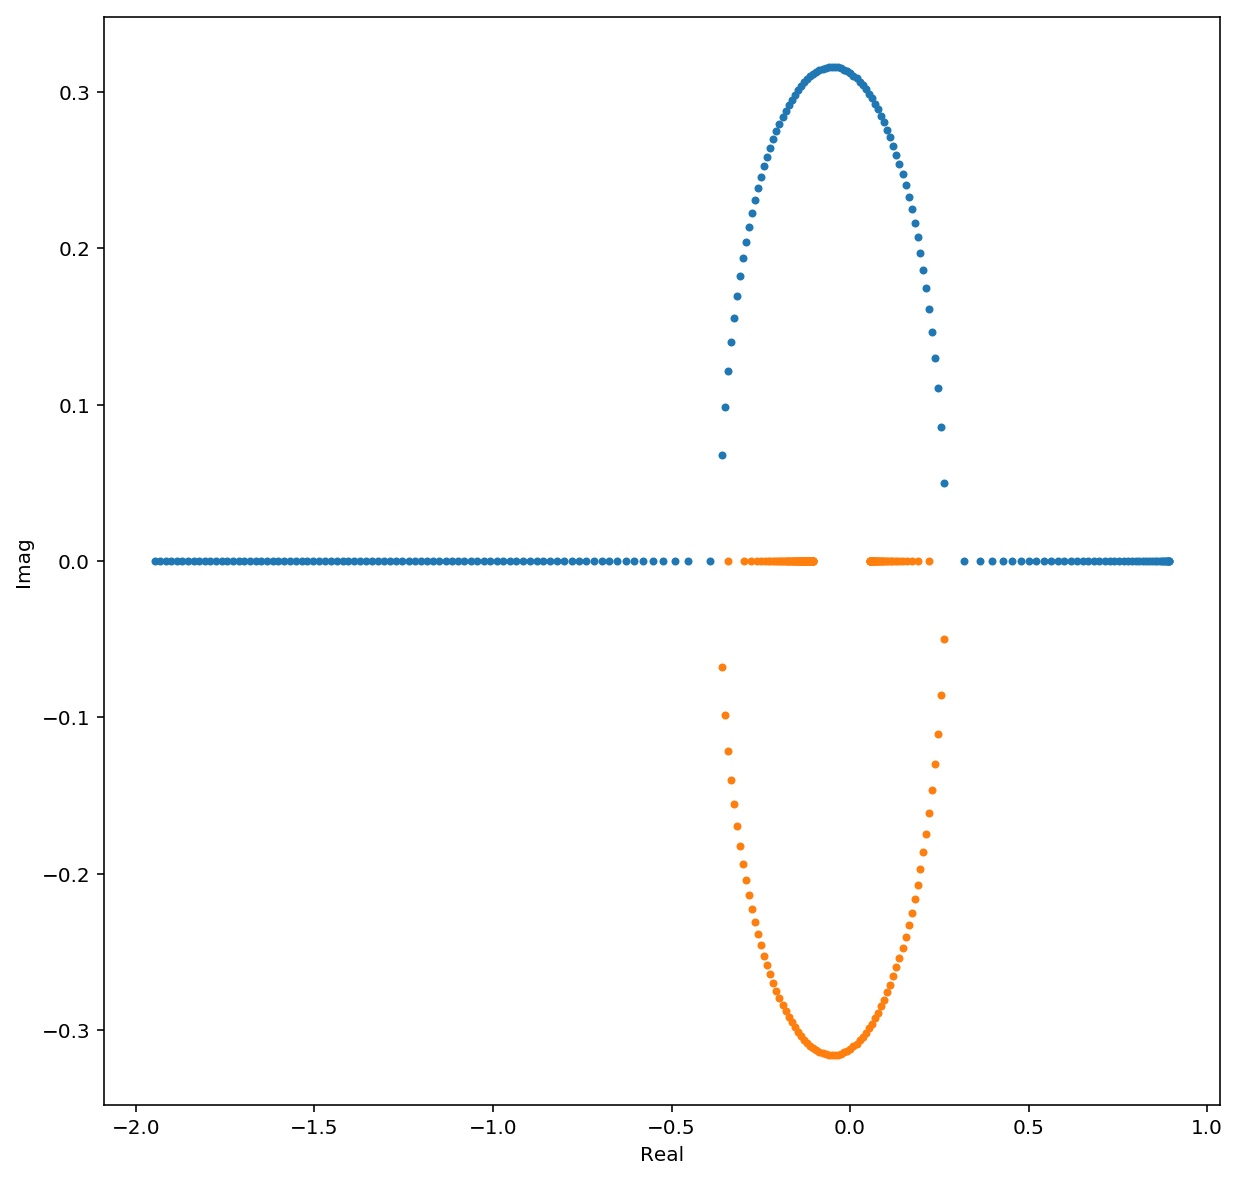

In [69]:
E = np.array(es)
plt.plot(np.real(E), np.imag(E), '.')
plt.xlabel('Real')
plt.ylabel('Imag')

The fixed point starts by being stable, then bifurcates to create two imaginary stable points, then crosses over so the real parts are positive (unstable), and then crosses over to purely real eigenvalues. The critical component here is when the real part of the eigenvalues become positive.

(1.0, 1.5)

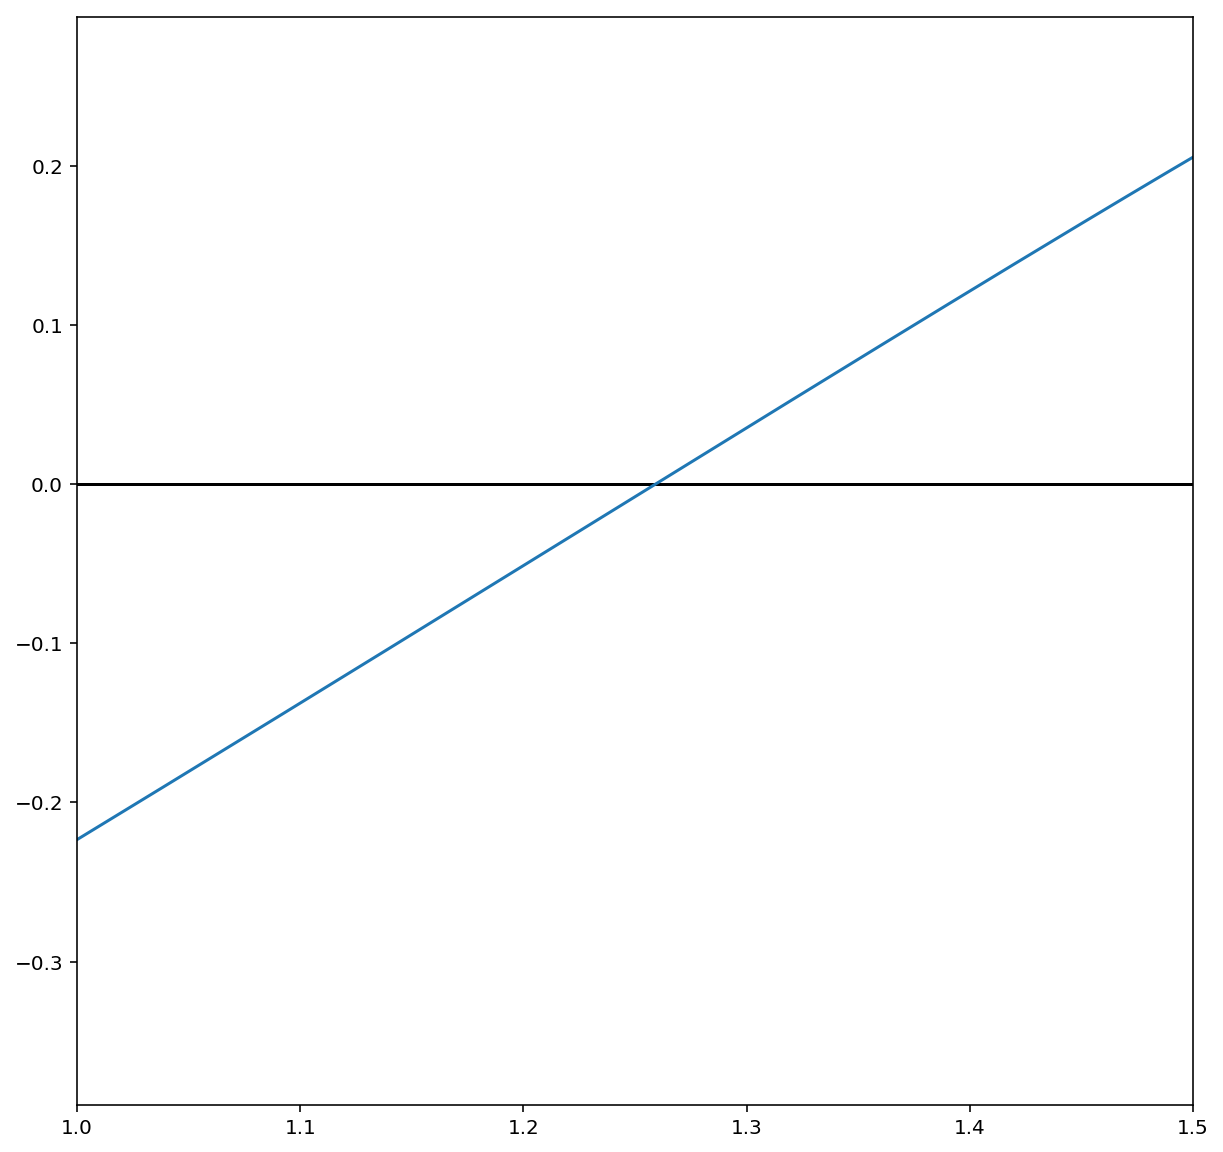

In [75]:
plt.plot(Is, np.real(np.array(es)[:, 1]))
plt.hlines(xmin=0, xmax=2, y = 0)
plt.xlim((1.0, 1.5))

And we see the crossover is at about 1.26, consistent with the previous observation.